# Python Treemaps with Squarify & Matplotlib
---

Treemaps are visualizations that split the area of our chart to display the value of our datapoints. They display shapes in sizes appropriate to their value, so bigger rectangles represent higher values.

We can combine our treemap with matplitlib library's ability to scale colours against variables to make good look and easy to understand plots with Python.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

In [11]:
data = pd.read_csv('../csv/brentford.csv').sort_values(by=['Gls'], ascending=False)
data.head()

,Player,Pos,MP,Starts,Min,Gls,Ast,CrdY,CrdR,id
4,Ivan Toney,FW,33,32,2909.0,12.0,5.0,8.0,0.0,e09f279b
11,Yoane Wissa,FW,30,12,1284.0,7.0,1.0,0.0,0.0,2500cef9
2,Bryan Mbeumo,FW,35,34,2905.0,4.0,7.0,4.0,0.0,6afaebf2
6,Vitaly Janelt,MF,31,27,2298.0,4.0,0.0,3.0,0.0,8449d35e
0,Pontus Jansson,DF,37,37,3321.0,3.0,1.0,7.0,0.0,172e52d8


Let's visualize where Brentford's threat on goal comes from, and who they rely on for goals and assists. We'll do this with a treemap.

We will create our treemap in a few key steps:

1. Create a new dataframe that only contains players that have scored.
2. Utilize matplotlib to create a colour map that assigns each player a colour according to how many goals they have scored.
3. Set up a new, rectangular plot for our heatmap
4. Plot our data & title
5. Show the plot, with no axes

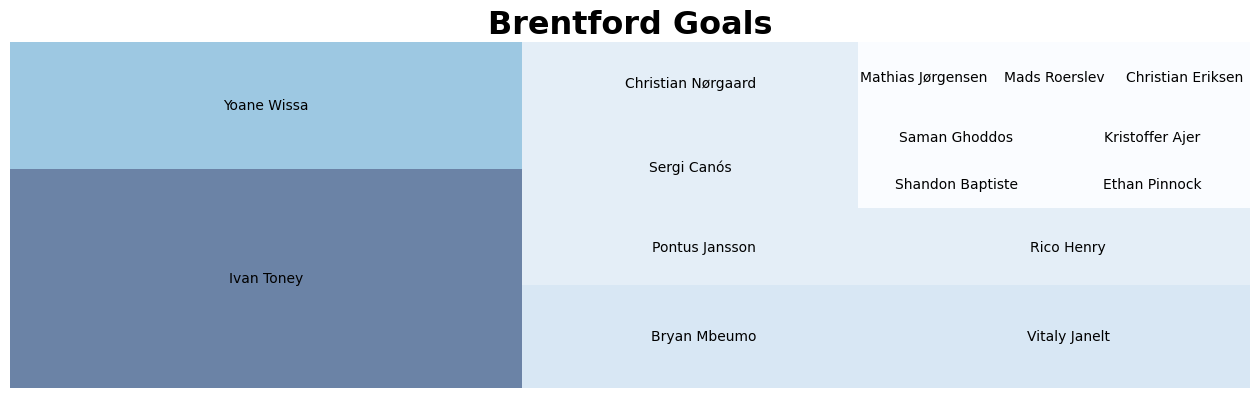

In [12]:
# new data, containing only players with more than 0 goals
data_goals = data[data['Gls']>0]

# utilize matplotlib to scale or goal numbers between the min and max, then assign this scale to our values
norm = matplotlib.colors.Normalize(vmin=min(data_goals.Gls), vmax=max(data_goals.Gls))
colors = [matplotlib.cm.Blues(norm(value)) for value in data_goals.Gls]

# Create our plot and resize it
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

# use squarify to plot our data, label it, and add colours. We add an alpha player to ensure black labels show through
squarify.plot(label=data_goals.Player, sizes=data_goals.Gls, color=colors, alpha=.6)
plt.title('Brentford Goals', fontsize=23, fontweight='bold')

# remove our axes and display the plot
plt.axis('off')
plt.show()

Now let's build a treemap for assists.

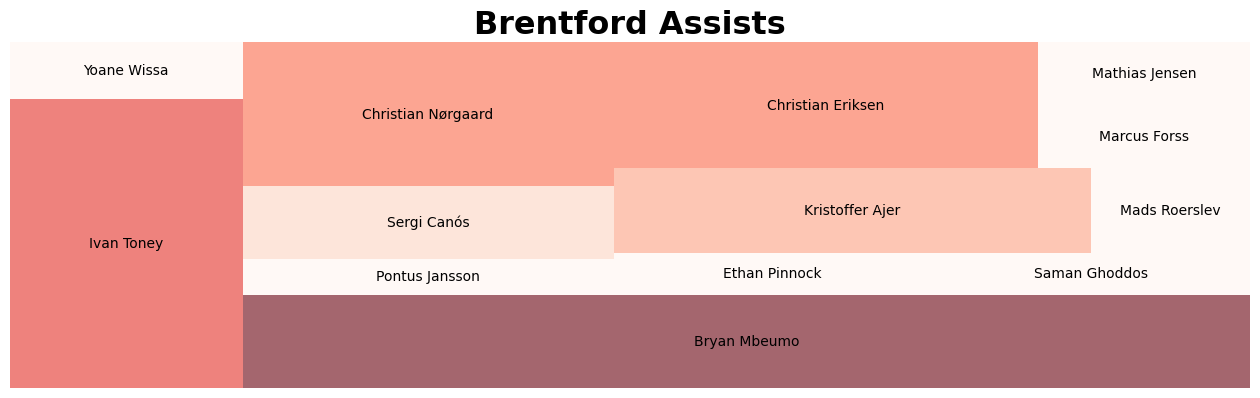

In [13]:
data_assists = data[data['Ast'] > 0]

norm = matplotlib.colors.Normalize(vmin=min(data_assists.Ast), vmax=max(data_assists.Ast))
colors = [matplotlib.cm.Reds(norm(value)) for value in data_assists.Ast]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 4.5)

squarify.plot(label=data_assists.Player, sizes=data_assists.Ast, color=colors, alpha=.6)
plt.title('Brentford Assists', fontsize=23, fontweight='bold')

plt.axis('off')
plt.show()